# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Three observations that can be drawn from the outputs are:
1- The percentage of male mice is higher than the percentange of female mice
2- By looking at the tumor volume vs Capomulin treatment line plot, we notice that the tumor volume went up then down then slightly up then sharply down and so on. So we conclude that the Capoomulin regimen treatment actually works in this experiment.
3- Capomulin has the highest number of timepoints (days) tested for drugs and Propriva has the lowest.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data=pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
combine_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
mice=combine_data["Mouse ID"].value_counts()
n_of_mice=len(mice)
n_of_mice

249

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate=combine_data.loc[combine_data.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()

In [51]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id=pd.DataFrame(mice_duplicate)
duplicate_id


,0
0,g989


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_frame=combine_data[combine_data["Mouse ID"].isin(mice_duplicate)==False]
clean_frame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
mice_clean=clean_frame["Mouse ID"].value_counts()
n_clean_mice=len(mice_clean)
n_clean_mice

248

## Summary Statistics

In [263]:
one=combine_data.groupby("Drug Regimen")
two=one.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
two

TypeError: Could not convert s185s185s185s185s185s185s185s185s185s185x401x401x401x401x401x401x401x401x401x401m601m601m601m601m601m601m601m601m601m601f966f966f966f966f966u364u364u364u364u364u364u364u364u364u364y793y793y793y793y793y793y793y793y793y793r554r554r554r554r554r554r554r554r554r554m957m957m957m957m957m957m957m957m957m957t565t565t565t565t565t565t565t565t565t565i738i738i738i738i738i738i738i738i738i738w914w914w914w914w914w914w914w914w914w914g288g288g288g288g288g288g288g288g288g288l897l897l897l897l897l897l897l897l897l897b742b742b742b742b742b742b742b742b742b742b128b128b128b128b128b128b128b128b128b128j246j246j246j246j246j246j246j246j119j119j119j119j119j119j119j119j119j119w150w150w150v923v923v923v923v923v923v923v923v923v923g316g316g316g316g316g316g316g316g316g316s710s710s710s710s710s710s710s710s710s710l509l509l509l509l509l509l509l509l509l509r944r944r944r944r944r944r944r944r944r944i557i557i557i557i557i557i557i557i557i557r157r157r157r157 to numeric

In [264]:
mean=combine_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=combine_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=combine_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard=combine_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems=combine_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
table1=pd.DataFrame(mean)
table2=table1.rename(columns={"Tumor Volume (mm3)": "mean"})
table2["median"]=median
table2["var"]=variance
table2["std"]=standard
table2["sem"]=sems
table2

TypeError: Could not convert s185s185s185s185s185s185s185s185s185s185x401x401x401x401x401x401x401x401x401x401m601m601m601m601m601m601m601m601m601m601f966f966f966f966f966u364u364u364u364u364u364u364u364u364u364y793y793y793y793y793y793y793y793y793y793r554r554r554r554r554r554r554r554r554r554m957m957m957m957m957m957m957m957m957m957t565t565t565t565t565t565t565t565t565t565i738i738i738i738i738i738i738i738i738i738w914w914w914w914w914w914w914w914w914w914g288g288g288g288g288g288g288g288g288g288l897l897l897l897l897l897l897l897l897l897b742b742b742b742b742b742b742b742b742b742b128b128b128b128b128b128b128b128b128b128j246j246j246j246j246j246j246j246j119j119j119j119j119j119j119j119j119j119w150w150w150v923v923v923v923v923v923v923v923v923v923g316g316g316g316g316g316g316g316g316g316s710s710s710s710s710s710s710s710s710s710l509l509l509l509l509l509l509l509l509l509r944r944r944r944r944r944r944r944r944r944i557i557i557i557i557i557i557i557i557i557r157r157r157r157 to numeric

## Bar and Pie Charts

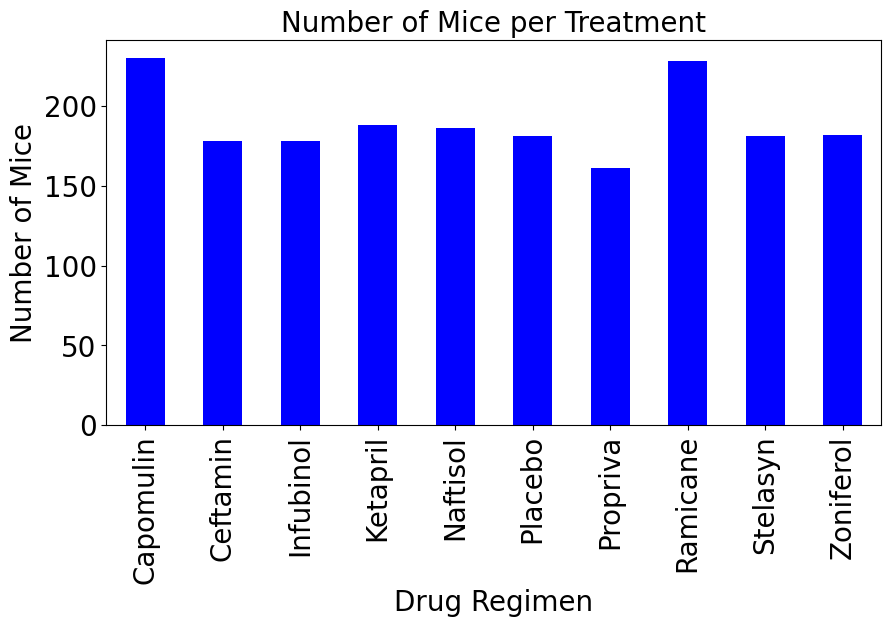

In [265]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_treatment=combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
plot=mice_per_treatment.plot.bar(figsize=(10,5),color="b",fontsize=20)
mice_per_treatment
plt.xlabel("Drug Regimen",fontsize=20)
plt.ylabel("Number of Mice",fontsize=20)
plt.title("Number of Mice per Treatment",fontsize=20)
plt.tight_layout
plt.show()








Text(0, 0.5, 'Number of Mice')

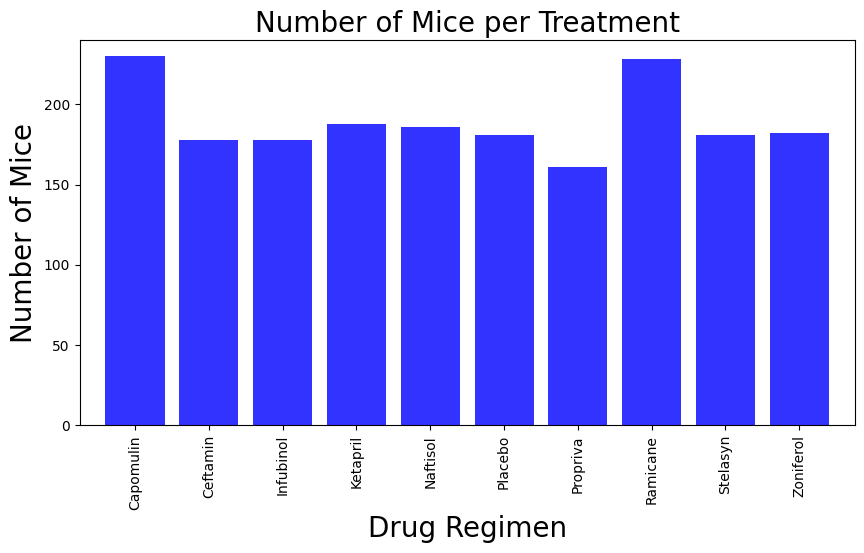

In [266]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_array=(combine_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_array
x_axis=np.arange(len(mice_per_treatment))
fig1,ax1=plt.subplots(figsize=(10,5))
plt.bar(x_axis,mice_array,color="b",alpha=0.8,align="center")
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(mice_array)+10)
plt.title("Number of Mice per Treatment",fontsize=20)
plt.xlabel("Drug Regimen",fontsize=20)
plt.ylabel("Number of Mice",fontsize=20)

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group_gender=combine_data.groupby(["Mouse ID","Sex"])
group_gender
gender_data=pd.DataFrame(group_gender.size())
gender_of_mouse=pd.DataFrame(gender_data.groupby(["Sex"]).count())
gender_of_mouse.columns=["Total Count"]
gender_of_mouse["Percentage of Sex"]=(100*(gender_of_mouse["Total Count"]/gender_of_mouse["Total Count"].sum()))
gender_of_mouse["Percentage of Sex"]=gender_of_mouse["Percentage of Sex"]
gender_of_mouse






,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


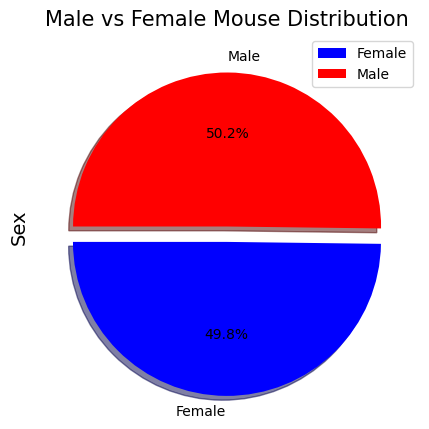

In [137]:
color=["blue","red"]
distance=(0.1,0)
plot1=gender_of_mouse.plot.pie(y="Total Count",figsize=(5,5),colors=color,startangle=180,explode=distance,shadow=True,autopct="%1.1f%%")
plt.title("Male vs Female Mouse Distribution",fontsize=15)
plt.ylabel("Sex",fontsize=14)
plt.show()

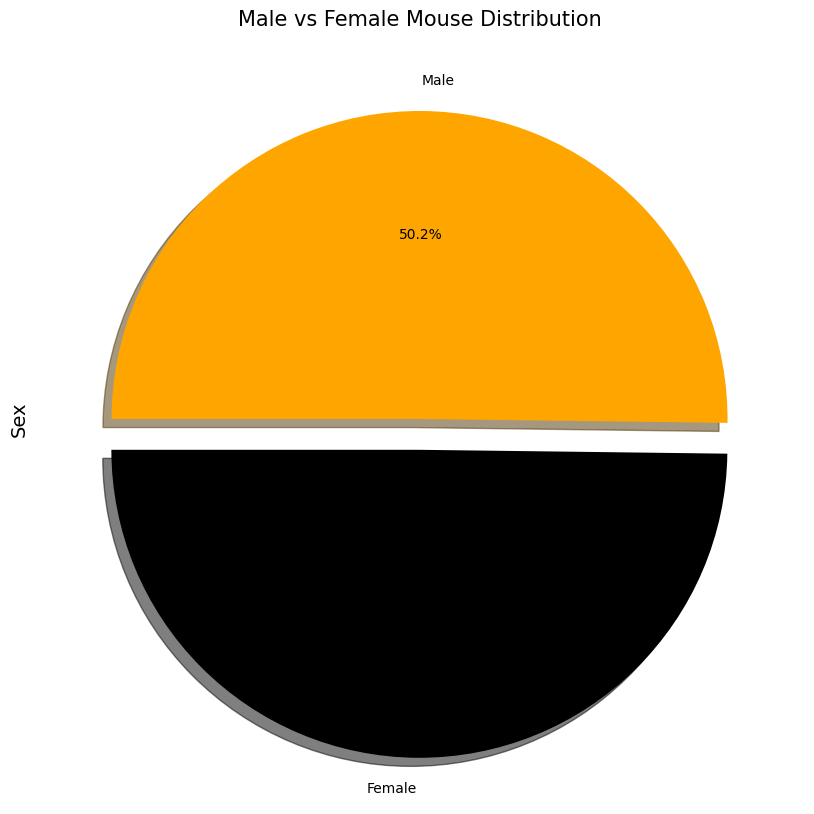

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=["Female","Male"]
size=[49.8,50.2]
color1=["black","orange"]
distance1=[0.1,0]
fig1,ax1=plt.subplots(figsize=(15,10))
plt.pie(size,explode=distance1,labels=label,colors=color1,autopct="%1.1f%%",shadow=True,startangle=180)
plt.title("Male vs Female Mouse Distribution",fontsize=15)
plt.ylabel("Sex",fontsize=14)
plt.show()

## Quartiles, Outliers and Boxplots

In [244]:
capomulin_reg=combine_data.loc[combine_data["Drug Regimen"]=="Capomulin",:]
ramicane_reg=combine_data.loc[combine_data["Drug Regimen"]=="Ramicane",:]
infubinol_reg=combine_data.loc[combine_data["Drug Regimen"]=="Infubinol",:]
ceftamin_reg=combine_data.loc[combine_data["Drug Regimen"]=="Ceftamin",:]



capomulin_reg.head()
capomulin_last=capomulin_reg.groupby("Mouse ID").max()["Timepoint"]
capomulin_volume=pd.DataFrame(capomulin_last)
capomulin_merge=pd.merge(capomulin_volume,combine_data,on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head(5)
capo_tumor=capomulin_merge["Tumor Volume (mm3)"]
quartile=capo_tumor.quantile([0.25,0.5,0.75])
lowq=quartile[0.25]
upq=quartile[0.75]
iqr=upq-lowq
low_bound=lowq-(1.5*iqr)
up_bound=upq+(1.5*iqr)
print(f"Capomulin's potential outliers: {low_bound} and {up_bound}")



ramicane_last=ramicane_reg.groupby("Mouse ID").max()["Timepoint"]
ramicane_volume=pd.DataFrame(ramicane_last)
ramicane_merge=pd.merge(ramicane_volume,combine_data,on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head(10)
ramicane_tumor=ramicane_merge["Tumor Volume (mm3)"]
quartile=ramicane_tumor.quantile([0.25,0.5,0.75])
lowq=quartile[0.25]
upq=quartile[0.75]
iqr=upq-lowq
low_bound=lowq-(1.5*iqr)
up_bound=upq+(1.5*iqr)
print(f"Ramicane's potential outliers: {low_bound} and {up_bound}")


infubinol_last=infubinol_reg.groupby("Mouse ID").max()["Timepoint"]
infubinol_volume=pd.DataFrame(infubinol_last)
infubinol_merge=pd.merge(infubinol_volume,combine_data,on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head(10)
infubinol_tumor=infubinol_merge["Tumor Volume (mm3)"]
quartile=infubinol_tumor.quantile([0.25,0.5,0.75])
lowq=quartile[0.25]
upq=quartile[0.75]
iqr=upq-lowq
low_bound=lowq-(1.5*iqr)
up_bound=upq+(1.5*iqr)
print(f"Infubinol's potential outliers: {low_bound} and {up_bound}")




ceftamin_last=ceftamin_reg.groupby("Mouse ID").max()["Timepoint"]
ceftamin_volume=pd.DataFrame(ceftamin_last)
ceftamin_merge=pd.merge(ceftamin_volume,combine_data,on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head(10)
ceftamin_tumor=ceftamin_merge["Tumor Volume (mm3)"]
quartile=ceftamin_tumor.quantile([0.25,0.5,0.75])
lowq=quartile[0.25]
upq=quartile[0.75]
iqr=upq-lowq
low_bound=lowq-(1.5*iqr)
up_bound=upq+(1.5*iqr)
print(f"Ceftamin's potential outliers: {low_bound} and {up_bound}")



Capomulin's potential outliers: 20.70456164999999 and 51.83201549
Ramicane's potential outliers: 17.912664470000003 and 54.30681135
Infubinol's potential outliers: 36.83290494999999 and 82.74144559000001
Ceftamin's potential outliers: 25.355449580000002 and 87.66645829999999


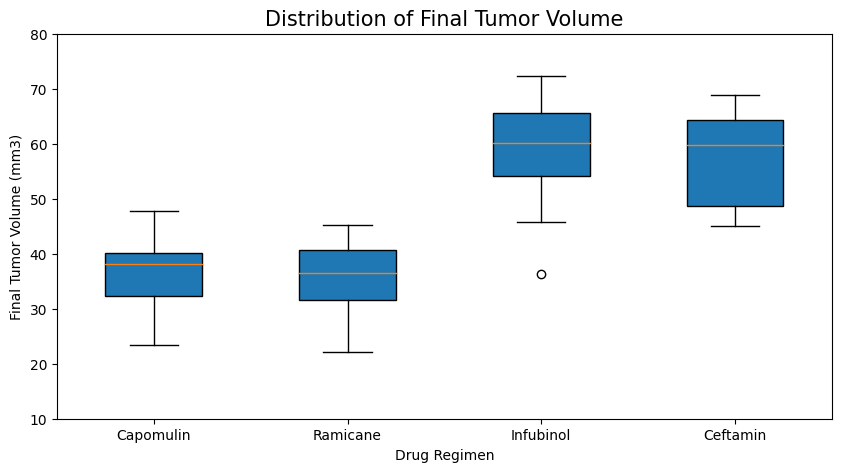

In [245]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_data=[capo_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]
regimens=["Capomulin","Ramicane","Infubinol","Ceftamin"]
fig1,ax1=plt.subplots(figsize=(10,5))
ax1.set_title("Distribution of Final Tumor Volume",fontsize=15)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize=10)
ax1.set_xlabel("Drug Regimen",fontsize=10)
ax1.boxplot(plot_data,labels=regimens,widths=0.5,patch_artist=True,vert=True)
plt.ylim(10,80)
plt.show()



## Line and Scatter Plots

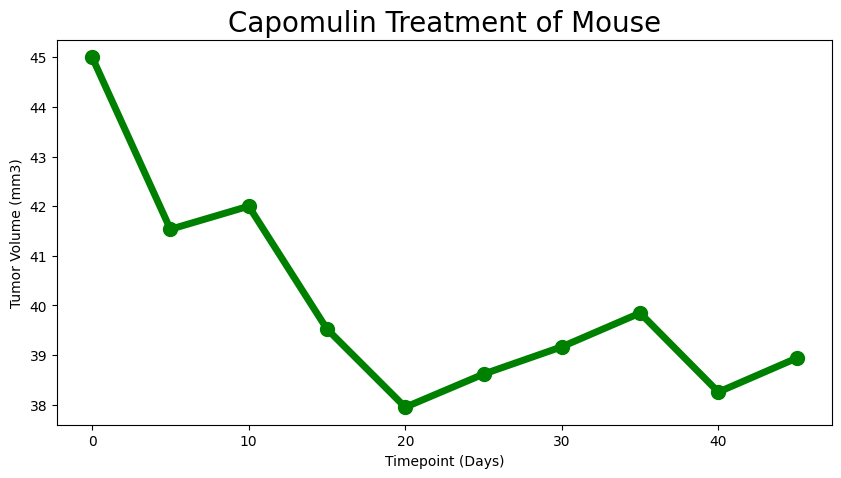

In [273]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df=capomulin_reg.loc[capomulin_reg["Mouse ID"]=="b742",:]
line_df.head()

x_axis=line_df["Timepoint"]
tumor_size=line_df["Tumor Volume (mm3)"]

fig1,ax1=plt.subplots(figsize=(10,5))
plt.title("Capomulin Treatment of Mouse",fontsize=20)
plt.plot(x_axis,tumor_size,linewidth=5,markersize=10,marker="o",color="green",label="Fahreneit")
plt.xlabel("Timepoint (Days)",fontsize=10)
plt.ylabel("Tumor Volume (mm3)",fontsize=10)
plt.show()

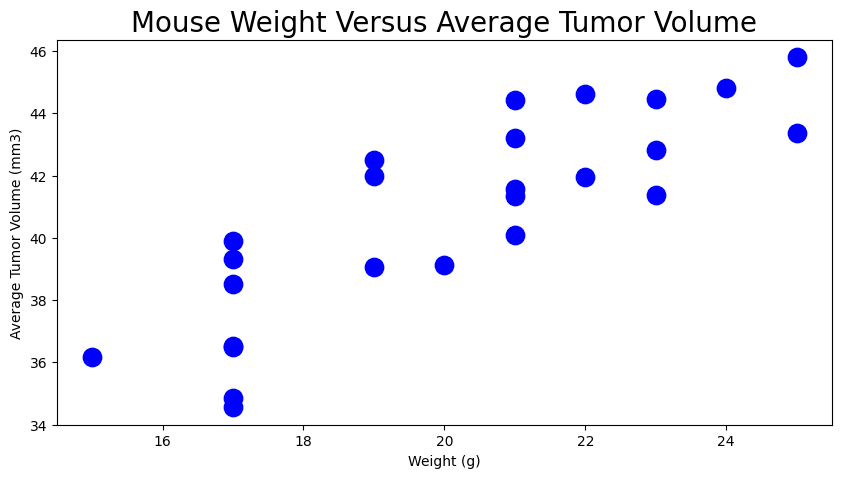

In [191]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1,ax1=plt.subplots(figsize=(10,5))
average_capo_volume=capomulin_reg.groupby(["Mouse ID"]).mean(str)
mrker_size=15
plt.scatter(average_capo_volume["Weight (g)"],average_capo_volume["Tumor Volume (mm3)"],s=175,color="blue")
plt.title("Mouse Weight Versus Average Tumor Volume",fontsize=20)
plt.xlabel("Weight (g)",fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=10)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


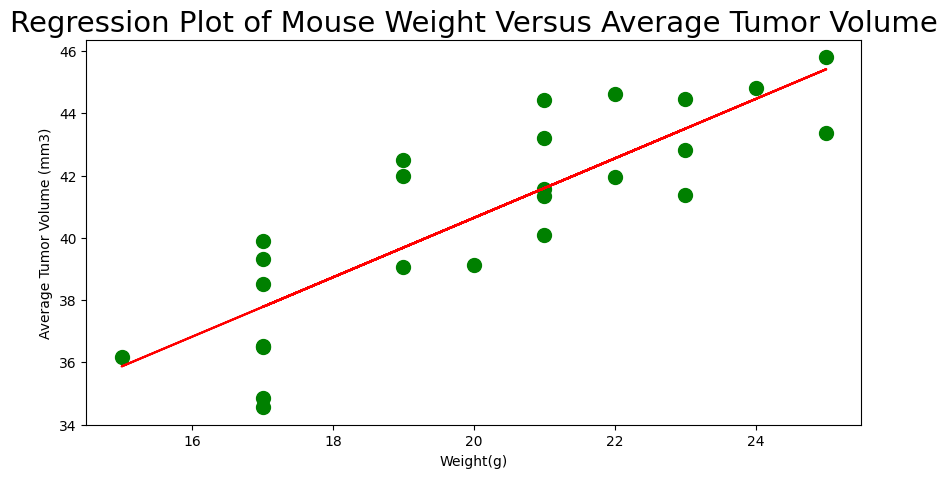

In [238]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(average_capo_volume["Weight (g)"],average_capo_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
x_values=average_capo_volume["Weight (g)"]
y_values=average_capo_volume["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regression_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))


fig1,ax1=plt.subplots(figsize=(10,5))
plt.scatter(x_values,y_values,s=100,color="green")
plt.plot(x_values,regression_values,"r-")
plt.title("Regression Plot of Mouse Weight Versus Average Tumor Volume",fontsize=21)
plt.xlabel("Weight(g)",fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=10)

plt.show()